# DBSCAN

In [49]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import math
import matplotlib

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

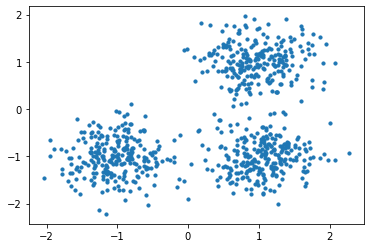

In [3]:
plt.scatter(X[:,0], X[:,1],s=10)

In [5]:
 from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
y = scale.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

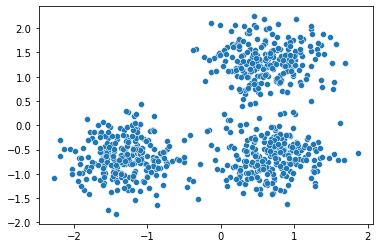

In [7]:
sns.scatterplot( y[:,0],y[:,1] , data=y)

In [11]:
from sklearn.cluster import DBSCAN

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

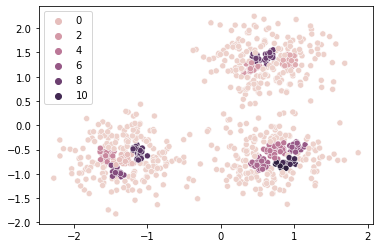

In [40]:
clus = DBSCAN(eps =.1, min_samples=10).fit(y)
cluster = clus.labels_
len(set(cluster))
sns.scatterplot(y[:,0],y[:,1], data  =y,hue=cluster )

In [41]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

#### One circle won’t be sufficient to see the clustering ability of DBSCAN. Therefore, I have created three concentric circles of different radii. Also, I will add noise to this data so that we can see how different types of clustering algorithms deals with noise.



In [45]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])
df

,0,1
0,484.609288,5.299468
1,443.582039,-13.259126
2,466.155943,4.830683
3,466.385368,-28.983239
4,485.980536,11.990455
...,...,...
295,-433.000000,-515.000000
296,248.000000,474.000000
297,535.000000,-159.000000
298,-330.000000,-257.000000


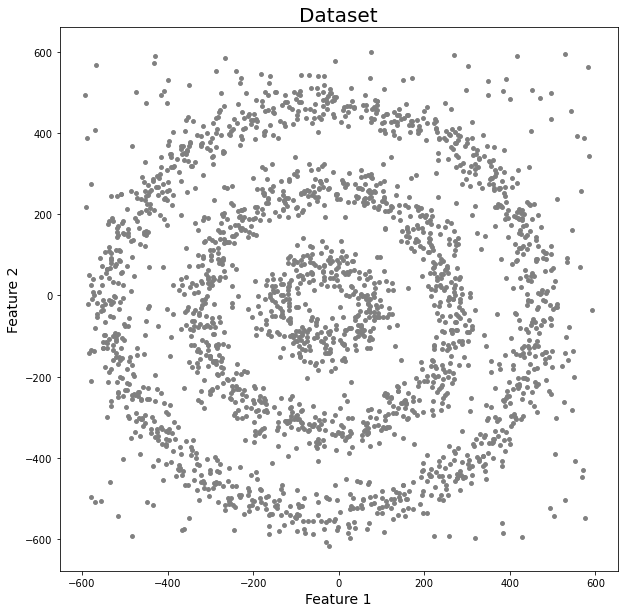

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


#### 1. K-Means
We’ll first start with K-Means because it is the easiest clustering algorithm

In [64]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

##### It’s time to see the results. Use labels_ to retrieve the labels. I have added these labels to the dataset in the new column so that data management can become easier. But don’t worry – I will only use two columns of the dataset for fitting other algorithms.

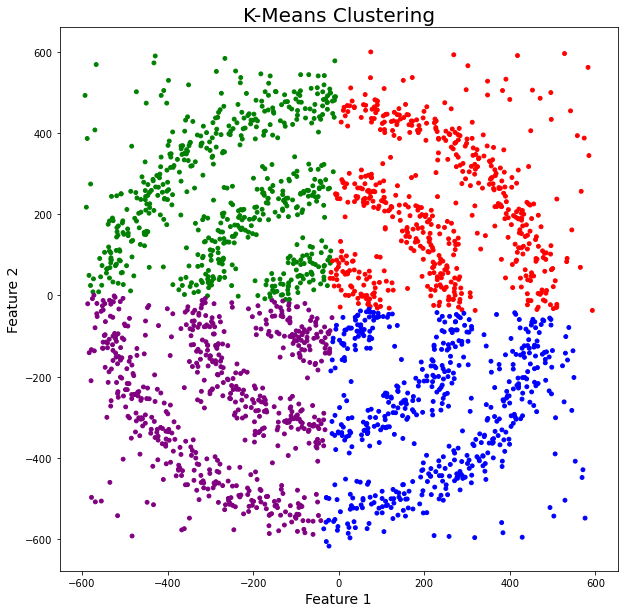

In [65]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

##### 2. Hierarchical Clustering
For this article, I am performing Agglomerative Clustering but there is also another type of hierarchical clustering algorithm known as Divisive Clustering. Use the following syntax:

In [51]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])


AgglomerativeClustering(n_clusters=4)

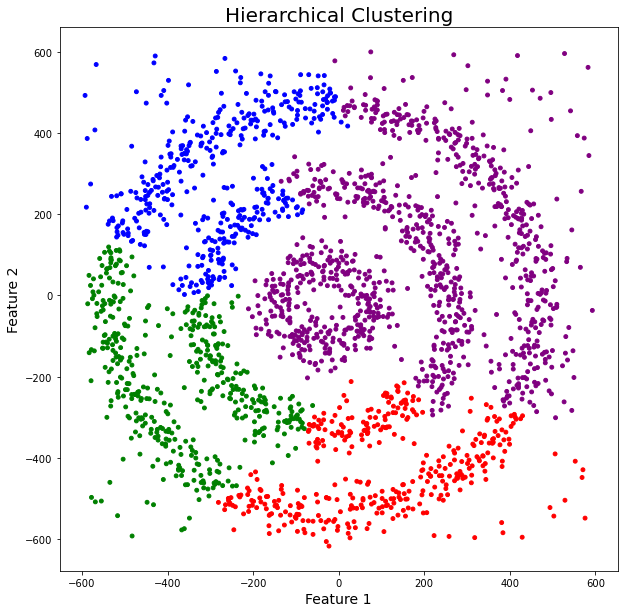

In [52]:
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

##### 3. DBSCAN Clustering
Now, it’s time to implement DBSCAN and see its power. Import DBSCAN from sklearn.cluster. Let’s first run DBSCAN without any parameter optimization and see the results.

In [53]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

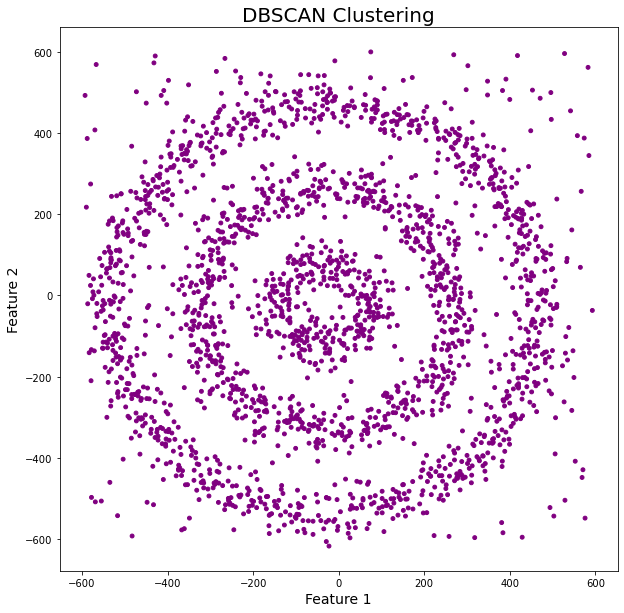

In [55]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

##### Interesting! All the data points are now of purple color which means they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.
For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors from sklearn.neighbors.


In [57]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

##### The distance variable contains an array of distances between a data point and its nearest data point for all data points in the dataset.

distance array

Let’s plot our K-distance graph and find the value of epsilon. Use the following syntax:

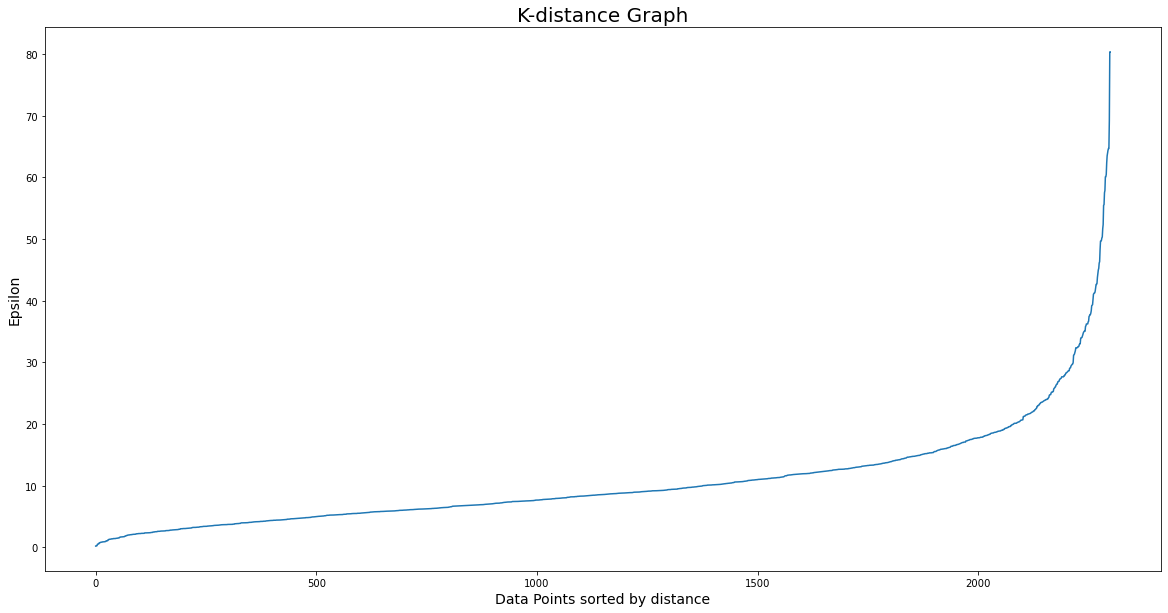

In [58]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

##### a
The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case. Now, it’s time to find the value of minPoints. The value of minPoints also depends on domain knowledge. This time I am taking minPoints as 6:

In [59]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()


 6    737
 0    655
 7    316
 2    251
-1    223
 1     62
 5     47
 4      5
 3      4
Name: DBSCAN_opt_labels, dtype: int64

###### The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0, 1 and 2 are the three different clusters, and -1 is the noise. Let’s plot the results and see what we get.

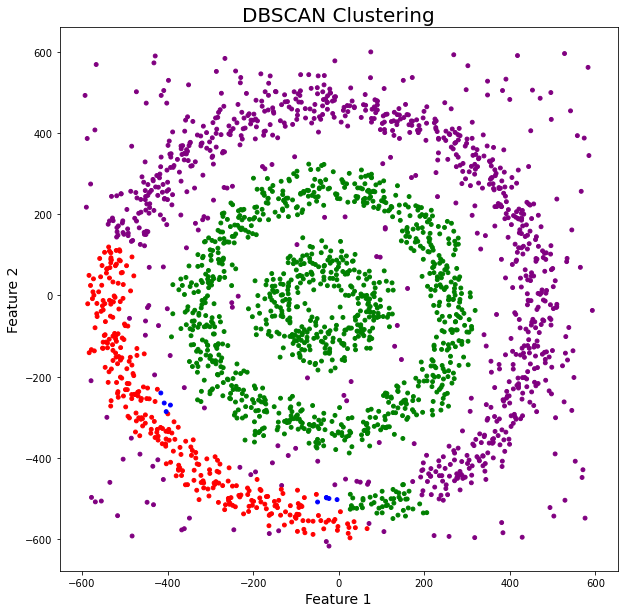

In [61]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()